# Kyle Burt
## 4 New NHL Divisions Due to Covid-19 and Their Performance The NHL was forced to created 4 divisions to geographically split up the teams. The North division comprised of all the Canadian teams was seen as the “weakest” division. I want to put this to the test, I will do this through comparing the North Divisions stats described below, and the other three American divisions seen as the “stronger” divisions.  his will be able to provide clarity on if Covid-19 divisions affect outcomes of the NHL.e.


 - See if the North Divisions stats were lower or higher than the rest of the divisions to see if they were 'weak'. 
 
 

# Milestone 3

In [2]:
import pandas as pd
data = pd.read_csv("../data/raw/Games - Natural Stat TrickTeam Season Totals - Natural Stat Trick.csv")
data


,Game,Team,Unnamed: 2,TOI,CF,CA,CF%,SCF,SCA,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,Limited ReportFull Report,45.583333,33,34,49.25,19,24,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,Limited ReportFull Report,45.583333,34,33,50.75,24,19,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,Limited ReportFull Report,50.683333,44,43,50.57,11,22,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,Limited ReportFull Report,50.683333,43,44,49.43,22,11,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,Limited ReportFull Report,48.600000,47,52,47.47,25,30,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,Limited ReportFull Report,40.966667,32,50,39.02,17,19,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,Limited ReportFull Report,47.416667,43,37,53.75,25,17,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,Limited ReportFull Report,47.416667,37,43,46.25,17,25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,Limited ReportFull Report,44.483333,43,35,55.13,30,18,62.50,24.00,94.44,1.184


## Task 1: Conduct a EDA

In [3]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

print(f"There are {data.shape} rows and columns in the data")
print(f"The columns in the data set are:  {data.columns}")

There are (1736, 13) rows and columns in the data
The columns in the data set are:  Index(['Game', 'Team', 'Unnamed: 2', 'TOI', 'CF', 'CA', 'CF%', 'SCF', 'SCA',
       'SCF%', 'SH%', 'SV%', 'PDO'],
      dtype='object')


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TOI,1736.0,48.557661,4.241102,31.783333,45.6625,48.933333,51.500,68.200
CF,1736.0,42.956221,9.312960,19.000000,36.0000,43.000000,49.000,78.000
CA,1736.0,42.956221,9.312960,19.000000,36.0000,43.000000,49.000,78.000
CF%,1736.0,50.000035,8.153142,25.270000,44.1600,50.000000,55.840,74.730
SCF,1736.0,20.467166,6.146442,4.000000,16.0000,20.000000,24.000,48.000
SCA,1736.0,20.467166,6.146442,4.000000,16.0000,20.000000,24.000,48.000
SCF%,1736.0,50.000063,10.623748,14.810000,43.1700,50.000000,56.830,85.190
SH%,1736.0,8.458710,6.235143,0.000000,4.1700,7.690000,12.500,50.000
SV%,1736.0,91.541394,6.235157,50.000000,87.5000,92.310000,95.830,100.000
PDO,1736.0,1.000009,0.091223,0.553000,0.9420,1.000000,1.058,1.447


In [4]:
data.describe(include = 'object').T

,count,unique,top,freq
Game,1736,868,"2021-01-13 - Blackhawks 1, Lightning 5",2
Team,1736,31,Chicago Blackhawks,56
Unnamed: 2,1736,1,Limited ReportFull Report,1736


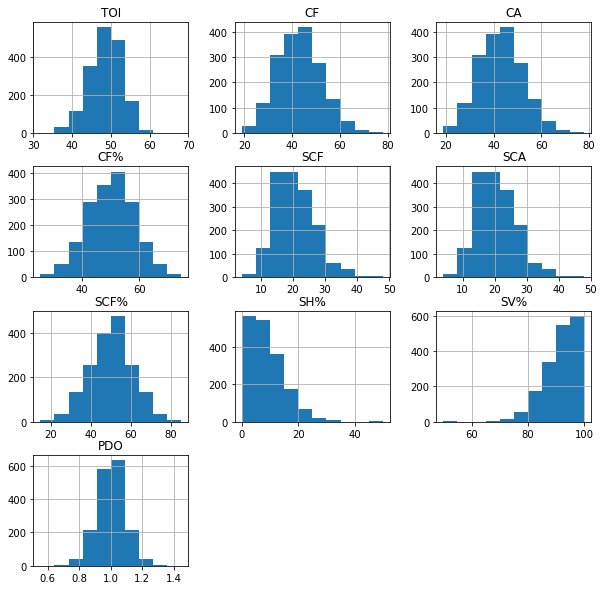

In [5]:
hist= data.hist(bins=10, figsize=(10,10))

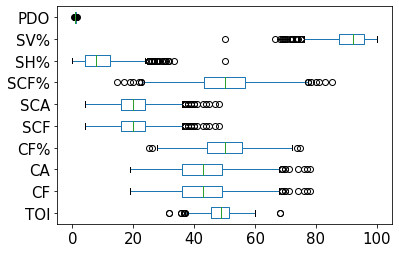

In [6]:
boxplot = data.boxplot(grid=False, vert=False,fontsize=15)

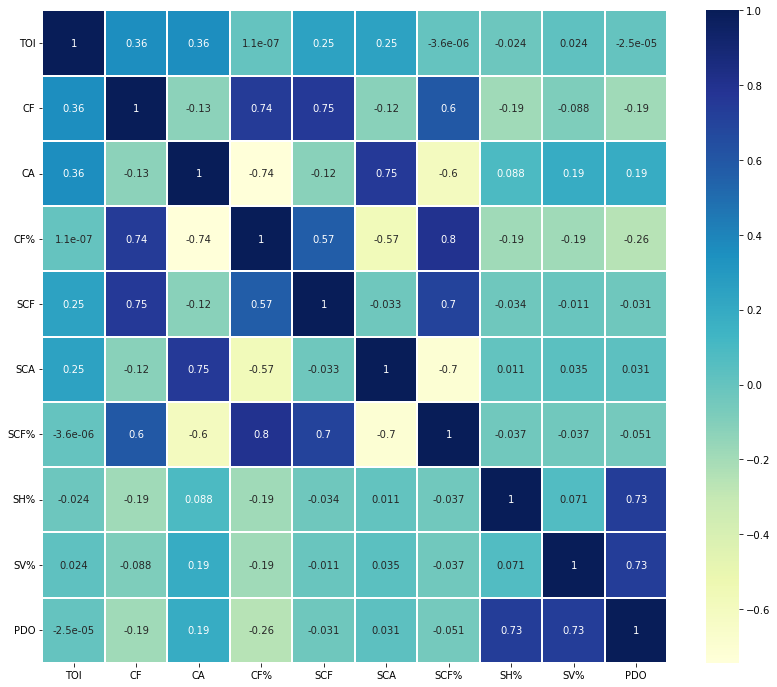

In [7]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

## Task 2: Analysis Pipeline 

In [127]:
df = data.drop(columns = ['CF', 'CA' , 'SCF' , 'SCA' , 'Unnamed: 2']) 
df

,Game,Team,TOI,CF%,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,45.583333,49.25,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,45.583333,50.75,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,50.683333,50.57,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,50.683333,49.43,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,48.600000,47.47,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,40.966667,39.02,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,47.416667,53.75,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,47.416667,46.25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,44.483333,55.13,62.50,24.00,94.44,1.184


##
- I have decided to drop the columns of CF,CA,SCF,SCA, and Unnamed: 2 as many of our stats are combined to produce a percentage, which will be more useful.
- I have ran a quick value count to make sure that I had the correct teams in the division and that they each played 56 regular season games. (31 teams x 56 games = 1736 games)
- I later decided to drop the team names and add a new column of the division name so I can compare data based on divisional play and not team play as it is not useful for my research question.

# North Division

In [128]:
northdiv1 = df.drop(data[data.Team.isin([ "Arizona Coyotes", "Buffalo Sabres", "Boston Bruins", "Carolina Hurricanes", "Columbus Blue Jackets", 
                                        "Chicago Blackhawks", "Colorado Avalanche", "Dallas Stars", "Detroit Red Wings", "Florida Panthers",
                                        "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "Pittsburgh Penguins", "San Jose Sharks", "Tampa Bay Lightning",
                                        "St Louis Blues", "Vegas Golden Knights", "New Jersey Devils", "New York Islanders", "New York Rangers", "Philadelphia Flyers", 
                                        "Washington Capitals", "Anaheim Ducks"])].index)
northdiv = northdiv1.reset_index()
print(northdiv['Team'].value_counts())
northdiv = northdiv.drop(columns = ['Team', 'index'])
northdiv['Division']='North'
northdiv

Montreal Canadiens     56
Toronto Maple Leafs    56
Edmonton Oilers        56
Vancouver Canucks      56
Calgary Flames         56
Winnipeg Jets          56
Ottawa Senators        56
Name: Team, dtype: int64


,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Canadiens 4, Maple Leafs 5",48.600000,47.47,45.45,9.09,90.00,0.991,North
1,"2021-01-13 - Canadiens 4, Maple Leafs 5",48.600000,52.53,54.55,10.00,90.91,1.009,North
2,"2021-01-13 - Canucks 5, Oilers 3",47.583333,41.76,45.83,12.00,83.87,0.959,North
3,"2021-01-13 - Canucks 5, Oilers 3",47.583333,58.24,54.17,16.13,88.00,1.041,North
4,"2021-01-14 - Canucks 2, Oilers 5",44.550000,44.14,45.28,8.33,93.33,1.017,North
...,...,...,...,...,...,...,...,...
387,"2021-05-16 - Flames 6, Canucks 5",40.966667,39.02,47.22,8.70,78.26,0.870,North
388,"2021-05-18 - Flames 2, Canucks 4",47.416667,53.75,59.52,3.33,86.36,0.897,North
389,"2021-05-18 - Flames 2, Canucks 4",47.416667,46.25,40.48,13.64,96.67,1.103,North
390,"2021-05-19 - Canucks 2, Flames 6",44.483333,55.13,62.50,24.00,94.44,1.184,North


## Steps for North Division 
- Dropped all teams that were not in the North division (Calgary, Edmonton, Montreal, Toronto, Winnipeg, Ottawa, Vancouver). 
- Reset the index and ran a value count on 'Team' to make sure that the correct teams were in the division I have created and they each played 56 games. 
- Dropped the columns team and index as I am looking at the division not each team in a division. 
- Added a new column 'Division' equal to North to be able to use just the North stats.  

# East Division

In [10]:
eastdiv1 = df.drop(data[data.Team.isin(["Arizona Coyotes", "Carolina Hurricanes", "Columbus Blue Jackets", "Calgary Flames", "Chicago Blackhawks", "Colorado Avalanche", 
                                       "Dallas Stars", "Detroit Red Wings", "Florida Panthers", "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "San Jose Sharks", 
                                       "Tampa Bay Lightning", "St Louis Blues", "Vegas Golden Knights", "Edmonton Oilers", "Montreal Canadiens","Ottawa Senators",
                                       "Toronto Maple Leafs", "Winnipeg Jets", "Anaheim Ducks", "Vancouver Canucks",])].index)
eastdiv = eastdiv1.reset_index()
print(eastdiv['Team'].value_counts())
eastdiv = eastdiv.drop(columns = ['Team', 'index'])
eastdiv['Division']='East'
eastdiv

Philadelphia Flyers    56
Pittsburgh Penguins    56
Boston Bruins          56
New Jersey Devils      56
Buffalo Sabres         56
Washington Capitals    56
New York Islanders     56
New York Rangers       56
Name: Team, dtype: int64


,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Penguins 3, Flyers 6",51.933333,44.19,48.65,18.18,93.33,1.115,East
1,"2021-01-13 - Penguins 3, Flyers 6",51.933333,55.81,51.35,6.67,81.82,0.885,East
2,"2021-01-14 - Bruins 3, Devils 2",43.366667,55.56,56.76,0.00,85.71,0.857,East
3,"2021-01-14 - Bruins 3, Devils 2",43.366667,44.44,43.24,14.29,100.00,1.143,East
4,"2021-01-14 - Capitals 6, Sabres 4",51.316667,51.47,55.17,10.53,80.95,0.915,East
...,...,...,...,...,...,...,...,...
443,"2021-05-10 - Devils 2, Flyers 4",47.066667,54.26,61.36,13.04,91.30,1.043,East
444,"2021-05-10 - Islanders 2, Bruins 3",45.850000,65.00,68.29,3.23,94.12,0.973,East
445,"2021-05-10 - Islanders 2, Bruins 3",45.850000,35.00,31.71,5.88,96.77,1.027,East
446,"2021-05-11 - Bruins 1, Capitals 2",56.516667,37.50,33.33,4.00,93.33,0.973,East


## Steps for East Division 
- Dropped all teams that were not in the East division (Pittsburgh, Washington, Boston, NY Islanders, NY Rangers, Philadelphia, New Jersey, Buffalo). 
- Reset the index and ran a value count on 'Team' to make sure that the correct teams were in the division I have created and they each played 56 games. 
- Dropped the columns team and index as I am looking at the division not each team in a division. 
- Added a new column 'Division' equal to East to be able to use just the East stats.  

# Central Division

In [11]:
centdiv1 = df.drop(data[data.Team.isin(["Arizona Coyotes", "Buffalo Sabres", "Boston Bruins", "Calgary Flames","Colorado Avalanche"
                                        ,"Los Angeles Kings", "Minnesota Wild","Pittsburgh Penguins", "San Jose Sharks", "St Louis Blues", "Vegas Golden Knights",
                                        "Edmonton Oilers", "Montreal Canadiens", "New Jersey Devils", "New York Islanders", 
                                        "New York Rangers", "Ottawa Senators", "Philadelphia Flyers", "Toronto Maple Leafs",
                                        "Winnipeg Jets", "Washington Capitals", "Anaheim Ducks", "Vancouver Canucks"])].index)
centdiv = centdiv1.reset_index()
print(centdiv['Team'].value_counts())
centdiv = centdiv.drop(columns = ['Team', 'index'])
centdiv['Division']='Central'
centdiv

Chicago Blackhawks       56
Tampa Bay Lightning      56
Columbus Blue Jackets    56
Nashville Predators      56
Carolina Hurricanes      56
Detroit Red Wings        56
Florida Panthers         56
Dallas Stars             56
Name: Team, dtype: int64


,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Blackhawks 1, Lightning 5",45.583333,49.25,44.19,0.00,86.36,0.864,Central
1,"2021-01-13 - Blackhawks 1, Lightning 5",45.583333,50.75,55.81,13.64,100.00,1.136,Central
2,"2021-01-14 - Blue Jackets 1, Predators 3",49.050000,48.04,45.45,4.00,92.59,0.966,Central
3,"2021-01-14 - Blue Jackets 1, Predators 3",49.050000,51.96,54.55,7.41,96.00,1.034,Central
4,"2021-01-14 - Hurricanes 3, Red Wings 0",50.266667,66.67,64.58,2.86,100.00,1.029,Central
...,...,...,...,...,...,...,...,...
443,"2021-05-10 - Hurricanes 0, Predators 5",45.883333,49.25,64.86,5.88,100.00,1.059,Central
444,"2021-05-10 - Lightning 0, Panthers 4",38.083333,46.38,44.00,15.79,100.00,1.158,Central
445,"2021-05-10 - Lightning 0, Panthers 4",38.083333,53.62,56.00,0.00,84.21,0.842,Central
446,"2021-05-10 - Stars 5, Blackhawks 4",50.666667,28.13,17.07,30.77,92.50,1.233,Central


## Steps for Central Division 
- Dropped all teams that were not in the Central division (Carolina, Florida, Tampa Bay, Nashville, Dallas, Chicago, Detroit, Columbus). 
- Reset the index and ran a value count on 'Team' to make sure that the correct teams were in the division I have created and they each played 56 games. 
- Dropped the columns team and index as I am looking at the division not each team in a division. 
- Added a new column 'Division' equal to Central to be able to use just the Central stats.  

# West Division

In [129]:
westdiv1= df.drop(data[data.Team.isin(["Buffalo Sabres", "Boston Bruins", "Carolina Hurricanes", 
                                        "Columbus Blue Jackets", "Calgary Flames", "Chicago Blackhawks",  "Dallas Stars", "Detroit Red Wings", "Florida Panthers",
                                       "Nashville Predators", "Pittsburgh Penguins","Tampa Bay Lightning","Edmonton Oilers", "Montreal Canadiens",
                                        "New Jersey Devils", "New York Islanders", "New York Rangers", "Ottawa Senators", 
                                        "Philadelphia Flyers", "Toronto Maple Leafs", "Winnipeg Jets", "Washington Capitals","Vancouver Canucks"])].index)
westdiv= westdiv1.reset_index()
print(westdiv['Team'].value_counts())
westdiv= westdiv.drop(columns = ['Team','index'])
westdiv['Division']='West'
westdiv

Colorado Avalanche      56
St Louis Blues          56
Anaheim Ducks           56
Vegas Golden Knights    56
Arizona Coyotes         56
San Jose Sharks         56
Los Angeles Kings       56
Minnesota Wild          56
Name: Team, dtype: int64


,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Blues 4, Avalanche 1",50.683333,50.57,33.33,0.00,85.19,0.852,West
1,"2021-01-13 - Blues 4, Avalanche 1",50.683333,49.43,66.67,14.81,100.00,1.148,West
2,"2021-01-14 - Ducks 2, Golden Knights 5",53.483333,51.16,42.86,11.11,84.62,0.957,West
3,"2021-01-14 - Ducks 2, Golden Knights 5",53.483333,48.84,57.14,15.38,88.89,1.043,West
4,"2021-01-14 - Sharks 4, Coyotes 3",44.833333,51.55,62.26,4.17,92.31,0.965,West
...,...,...,...,...,...,...,...,...
443,"2021-05-12 - Wild 0, Blues 4",52.000000,46.15,45.24,12.00,100.00,1.120,West
444,"2021-05-13 - Kings 1, Avalanche 5",53.683333,69.03,75.86,9.76,95.00,1.048,West
445,"2021-05-13 - Kings 1, Avalanche 5",53.683333,30.97,24.14,5.00,90.24,0.952,West
446,"2021-05-13 - Wild 3, Blues 7",50.450000,46.88,54.84,15.79,77.78,0.936,West


## Steps for West Division 
- Dropped all teams that were not in the West division (Colorado, Vegas, Minnesota, St. Louis, Arizona, Los Angeles, San Jose, Anaheim). 
- Reset the index and ran a value count on 'Team' to make sure that the correct teams were in the division I have created and they each played 56 games. 
- Dropped the columns team and index as I am looking at the division not each team in a division. 
- Added a new column 'Division' equal to West to be able to use just the West stats.  

# All Divisons (concatting all cleaned divisions into one)

In [14]:
data_frames = [northdiv, centdiv, eastdiv, westdiv] 
alldivisions = pd.concat([northdiv, centdiv, eastdiv,westdiv], axis=0)
alldivisions

,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Canadiens 4, Maple Leafs 5",48.600000,47.47,45.45,9.09,90.00,0.991,North
1,"2021-01-13 - Canadiens 4, Maple Leafs 5",48.600000,52.53,54.55,10.00,90.91,1.009,North
2,"2021-01-13 - Canucks 5, Oilers 3",47.583333,41.76,45.83,12.00,83.87,0.959,North
3,"2021-01-13 - Canucks 5, Oilers 3",47.583333,58.24,54.17,16.13,88.00,1.041,North
4,"2021-01-14 - Canucks 2, Oilers 5",44.550000,44.14,45.28,8.33,93.33,1.017,North
...,...,...,...,...,...,...,...,...
443,"2021-05-12 - Wild 0, Blues 4",52.000000,46.15,45.24,12.00,100.00,1.120,West
444,"2021-05-13 - Kings 1, Avalanche 5",53.683333,69.03,75.86,9.76,95.00,1.048,West
445,"2021-05-13 - Kings 1, Avalanche 5",53.683333,30.97,24.14,5.00,90.24,0.952,West
446,"2021-05-13 - Wild 3, Blues 7",50.450000,46.88,54.84,15.79,77.78,0.936,West


# Task 3 Method Chaining and Python Programs 

In [130]:
import project_functions2 as kp

In [131]:
dfp= kp.load_and_process(path_to_csv_file = "../data/raw/Games - Natural Stat TrickTeam Season Totals - Natural Stat Trick.csv")
dfp

,Game,Team,TOI,CF%,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,45.583333,49.25,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,45.583333,50.75,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,50.683333,50.57,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,50.683333,49.43,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,48.600000,47.47,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,40.966667,39.02,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,47.416667,53.75,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,47.416667,46.25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,44.483333,55.13,62.50,24.00,94.44,1.184


In [6]:
NorthDiv = kp.North_Div1(dfp)
NorthDiv

,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Canadiens 4, Maple Leafs 5",48.600000,47.47,45.45,9.09,90.00,0.991,North
1,"2021-01-13 - Canadiens 4, Maple Leafs 5",48.600000,52.53,54.55,10.00,90.91,1.009,North
2,"2021-01-13 - Canucks 5, Oilers 3",47.583333,41.76,45.83,12.00,83.87,0.959,North
3,"2021-01-13 - Canucks 5, Oilers 3",47.583333,58.24,54.17,16.13,88.00,1.041,North
4,"2021-01-14 - Canucks 2, Oilers 5",44.550000,44.14,45.28,8.33,93.33,1.017,North
...,...,...,...,...,...,...,...,...
387,"2021-05-16 - Flames 6, Canucks 5",40.966667,39.02,47.22,8.70,78.26,0.870,North
388,"2021-05-18 - Flames 2, Canucks 4",47.416667,53.75,59.52,3.33,86.36,0.897,North
389,"2021-05-18 - Flames 2, Canucks 4",47.416667,46.25,40.48,13.64,96.67,1.103,North
390,"2021-05-19 - Canucks 2, Flames 6",44.483333,55.13,62.50,24.00,94.44,1.184,North


In [7]:
CentDiv = kp.Cent_Div1(dfp)
CentDiv

,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Blackhawks 1, Lightning 5",45.583333,49.25,44.19,0.00,86.36,0.864,Central
1,"2021-01-13 - Blackhawks 1, Lightning 5",45.583333,50.75,55.81,13.64,100.00,1.136,Central
2,"2021-01-14 - Blue Jackets 1, Predators 3",49.050000,48.04,45.45,4.00,92.59,0.966,Central
3,"2021-01-14 - Blue Jackets 1, Predators 3",49.050000,51.96,54.55,7.41,96.00,1.034,Central
4,"2021-01-14 - Hurricanes 3, Red Wings 0",50.266667,66.67,64.58,2.86,100.00,1.029,Central
...,...,...,...,...,...,...,...,...
443,"2021-05-10 - Hurricanes 0, Predators 5",45.883333,49.25,64.86,5.88,100.00,1.059,Central
444,"2021-05-10 - Lightning 0, Panthers 4",38.083333,46.38,44.00,15.79,100.00,1.158,Central
445,"2021-05-10 - Lightning 0, Panthers 4",38.083333,53.62,56.00,0.00,84.21,0.842,Central
446,"2021-05-10 - Stars 5, Blackhawks 4",50.666667,28.13,17.07,30.77,92.50,1.233,Central


In [8]:
WestDiv = kp.West_Div1(dfp)
WestDiv

,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Blues 4, Avalanche 1",50.683333,50.57,33.33,0.00,85.19,0.852,West
1,"2021-01-13 - Blues 4, Avalanche 1",50.683333,49.43,66.67,14.81,100.00,1.148,West
2,"2021-01-14 - Ducks 2, Golden Knights 5",53.483333,51.16,42.86,11.11,84.62,0.957,West
3,"2021-01-14 - Ducks 2, Golden Knights 5",53.483333,48.84,57.14,15.38,88.89,1.043,West
4,"2021-01-14 - Sharks 4, Coyotes 3",44.833333,51.55,62.26,4.17,92.31,0.965,West
...,...,...,...,...,...,...,...,...
443,"2021-05-12 - Wild 0, Blues 4",52.000000,46.15,45.24,12.00,100.00,1.120,West
444,"2021-05-13 - Kings 1, Avalanche 5",53.683333,69.03,75.86,9.76,95.00,1.048,West
445,"2021-05-13 - Kings 1, Avalanche 5",53.683333,30.97,24.14,5.00,90.24,0.952,West
446,"2021-05-13 - Wild 3, Blues 7",50.450000,46.88,54.84,15.79,77.78,0.936,West


In [9]:
EastDiv = kp.East_Div1(dfp)
EastDiv

,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Penguins 3, Flyers 6",51.933333,44.19,48.65,18.18,93.33,1.115,East
1,"2021-01-13 - Penguins 3, Flyers 6",51.933333,55.81,51.35,6.67,81.82,0.885,East
2,"2021-01-14 - Bruins 3, Devils 2",43.366667,55.56,56.76,0.00,85.71,0.857,East
3,"2021-01-14 - Bruins 3, Devils 2",43.366667,44.44,43.24,14.29,100.00,1.143,East
4,"2021-01-14 - Capitals 6, Sabres 4",51.316667,51.47,55.17,10.53,80.95,0.915,East
...,...,...,...,...,...,...,...,...
443,"2021-05-10 - Devils 2, Flyers 4",47.066667,54.26,61.36,13.04,91.30,1.043,East
444,"2021-05-10 - Islanders 2, Bruins 3",45.850000,65.00,68.29,3.23,94.12,0.973,East
445,"2021-05-10 - Islanders 2, Bruins 3",45.850000,35.00,31.71,5.88,96.77,1.027,East
446,"2021-05-11 - Bruins 1, Capitals 2",56.516667,37.50,33.33,4.00,93.33,0.973,East


In [10]:
AllDiv = kp.all_divisions_describe(dfp)
AllDiv

,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Canadiens 4, Maple Leafs 5",48.600000,47.47,45.45,9.09,90.00,0.991,North
1,"2021-01-13 - Canadiens 4, Maple Leafs 5",48.600000,52.53,54.55,10.00,90.91,1.009,North
2,"2021-01-13 - Canucks 5, Oilers 3",47.583333,41.76,45.83,12.00,83.87,0.959,North
3,"2021-01-13 - Canucks 5, Oilers 3",47.583333,58.24,54.17,16.13,88.00,1.041,North
4,"2021-01-14 - Canucks 2, Oilers 5",44.550000,44.14,45.28,8.33,93.33,1.017,North
...,...,...,...,...,...,...,...,...
443,"2021-05-12 - Wild 0, Blues 4",52.000000,46.15,45.24,12.00,100.00,1.120,West
444,"2021-05-13 - Kings 1, Avalanche 5",53.683333,69.03,75.86,9.76,95.00,1.048,West
445,"2021-05-13 - Kings 1, Avalanche 5",53.683333,30.97,24.14,5.00,90.24,0.952,West
446,"2021-05-13 - Wild 3, Blues 7",50.450000,46.88,54.84,15.79,77.78,0.936,West


# Task 4
## Data Analysis:

In [11]:
print("Number of rows and columns respectively:", dfp.shape)
print("Columns in the dataset:", dfp.columns)

Number of rows and columns respectively: (1736, 8)
Columns in the dataset: Index(['Game', 'Team', 'TOI', 'CF%', 'SCF%', 'SH%', 'SV%', 'PDO'], dtype='object')


In [12]:
kp.all_divisions_describe(dfp).describe()



,TOI,CF%,SCF%,SH%,SV%,PDO
count,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000
mean,48.557661,50.000035,50.000063,8.458710,91.541394,1.000009
std,4.241102,8.153142,10.623748,6.235143,6.235157,0.091223
min,31.783333,25.270000,14.810000,0.000000,50.000000,0.553000
25%,45.662500,44.160000,43.170000,4.170000,87.500000,0.942000
50%,48.933333,50.000000,50.000000,7.690000,92.310000,1.000000
75%,51.500000,55.840000,56.830000,12.500000,95.830000,1.058000
max,68.200000,74.730000,85.190000,50.000000,100.000000,1.447000


# Divisional Corsi (CF%)

Text(0.5, 1.0, 'Divisions Corsi %')

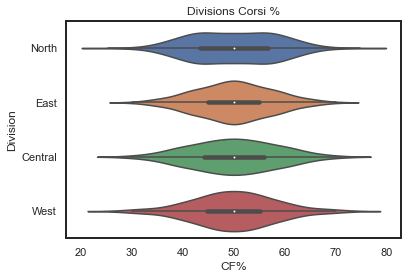

In [83]:
df = kp.all_divisions_describe(dfp)
(sns.violinplot(x="CF%", y="Division", data=df)).set_title("Divisions Corsi %")

# Results:
##        Corsi % (CF%) for a team takes the number of shot attempts by the team and divides it by the number of shot attempts by its opponent. This accounts for shots on goal, missed shots, blocked shots over the shots against, missed shots against and blocked shots against. This is a great stat for a teams puck possession, which can predict future success as well as who is dominating the game. A average co
 - The means are all so identcially close but when we look at the shape the north division stands out. 
 - All other divisions have a normal looking distribution with similar outliers. We see by their normal shape that they had a higher probability of getting a corsi % of around 50 and a lower probability of getting one lower than 50. all other divisions have a normal looking distribution with similar outliers. We see by their normal shape that they had a higher probability of getting a corsi % of around 50 and a lower probability of getting one lower/greater than 50.
 - North division has a greater range with more outliers having some very high CF% and some very low CF%. By the shape of their distribution it is not normal, it peaks and then flattens out and is almost constant between a Corsi % of 40 and 60. This shows that there probability of getting a CF% was almost identical between these values. This is helpful as it shows that the North division was inconsistent, some games they were playing great with Corsi% around 55-60%, but other games they had no control of the game with Corsi% between 40-45%. Just shown by the shape we can see that it isn't a major skew in the data between divisions but hockey is a game of split second decisions and the North division was struggling to play consistent. 

# Divisional Scoring Chances For Percentage (SCF%)

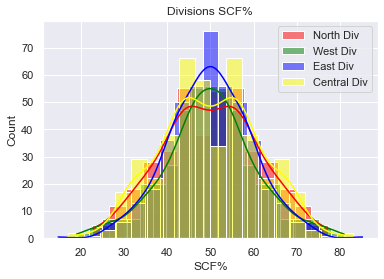

In [87]:
sns.set(style="darkgrid")
df = kp.North_Div1(dfp)
df1 = kp.West_Div1(dfp)
df2 = kp.East_Div1(dfp)
df3 = kp.Cent_Div1(dfp)

# Maybe dont do a histogram as it is confusing with all of the bars.
sns.histplot(data=df, x="SCF%", color="red", label="North Div", kde=True)
sns.histplot(data=df1, x="SCF%", color="green", label="West Div", kde=True)
sns.histplot(data=df2, x="SCF%", color="blue", label="East Div", kde=True)
sns.histplot(data=df3, x="SCF%", color="yellow", label="Central Div", kde=True)
plt.title('Divisions SCF%')
plt.legend() 
plt.show()

 # Results: 
 ## Scoring Chances For Percentage (SCF%) is the number of real scoring chances a team has over the course of the game. This will take Corsi events and subtracts any shot from outside a team’s offensive zone.
 - From the histogram comparing all divisions SCF% we can see a few interesting things. First we can see that the North division (Red) and the Central Divisions (Yellow) both has a dip when their SCF% was around 50 and peaked when around 40% and 60%, not only are they the lowest on the graph which means they had less games with a SCF% around 50% but they were a drastically gap between the other divisions with a normal distribution. This shows That when comparing the North division to the other three divisions, they were once again inconsistent. They had games with many scoring chances, but they also had games with a relative low scoring chance. This helps show that the north division was incoherent when playing agaisnt eachother night after night . When we look at the East division (Blue) we can see that in their divisional play all the teams were more consistent when playing against eachother. having the highest frequency around 50%. 

# Divisional Save Percentage (SV%) 

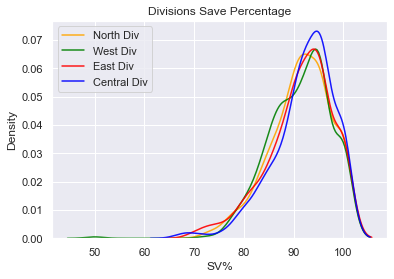

In [88]:
df4 = kp.North_Div1(dfp)
df5 = kp.West_Div1(dfp)
df6 = kp.East_Div1(dfp)
df7 = kp.Cent_Div1(dfp)
sns.kdeplot(data=df4, x="SV%", color = "orange", label="North Div", common_norm=False, alpha=0.9)
sns.kdeplot(data=df5, x="SV%", color = "green", label="West Div", common_norm=False, alpha=0.9)
sns.kdeplot(data=df6, x="SV%", color = "red",label="East Div",common_norm=False, alpha=0.9)
sns.kdeplot(data=df7, x="SV%", color = "blue" ,label="Central Div",  common_norm=False, alpha=0.9)
plt.title('Divisions Save Percentage')
plt.legend()
plt.show()

 # Results: 
 ## Save Percentage (SV%) helps determine a teams defense and goaltending by analyzing the number of shots on goal a goaltender saves.
 - From the density plot above we can see that the all the divisions had data skewed to the left which is good as you want your team to have a save percentage as close to 100%, thus letting in 0 goals. The North Division has some of the worst save percentage as they were peaking around the 90% mark, yet all other divisions were peaking around the mid 90's. The North division also has a lower probability of achieving this save %. The Central divison had the best goaltending as their probabaility of having a SV% above 90% was high; This also shows the same effect with the West and East divisions just with a slightly less high probability. Thus, the North division goaltending was struggling compared to other divsions, showing that they were sloppy in the defensive zone but also were saving less shots than the other divisions.

# Divisional Time on Ice (TOI)

Text(0.5, 0.98, 'NHL Divisions - TOI')

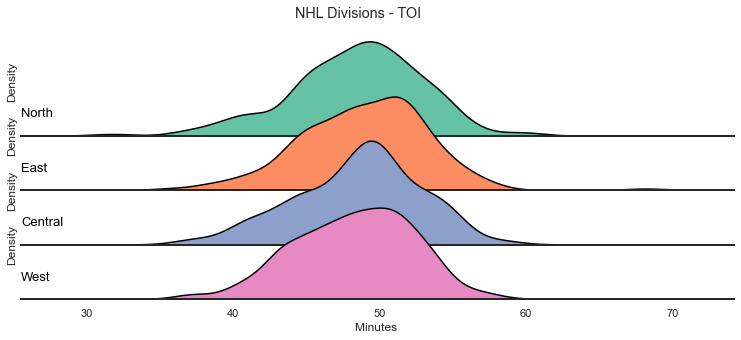

In [126]:
df1 = kp.all_divisions_describe(dfp)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df1, palette=palette, row="Division",hue = "Division", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="TOI", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="TOI", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='Black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "Division")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Minutes ")
g.despine( left=True)
plt.suptitle('NHL Divisions - TOI', y=0.98)

# Results: 
## Time on Ice (TOI) is a divisions total time on ice for 5v5, regular strength play. This is able to determine how disiplined a division was overal staying out of the penalty box.  
- From the ridgeline plot we have some interesting results. When we look at the  North divison we can see they that the peak is just before 50 minutes, we also have a dip before this around 40 minutes of time on ice. From the first dip we can see that they are playing less time on 5v5 play, as well as their peak is just before 50 minutes shows that they were playing less disiplined as there was more powerplay and penalty kill time. All other divisions are peaking just after 50 minutes with the density increasing up until their average time on ice. This shows that in other divisional play they were playing more disiplined, taking less penalities, and playing more 5v5 time. This is translated into a divisions overall performance as the more time spent playing 5v5 allows star players to be on the ice and help their team offensively and defensively. The North division was struggling to increase their minutes of 5 on 5 hockey and thus hurting their performance when looking at the divisions.

# Divisional Shooting Percentage (SH%)

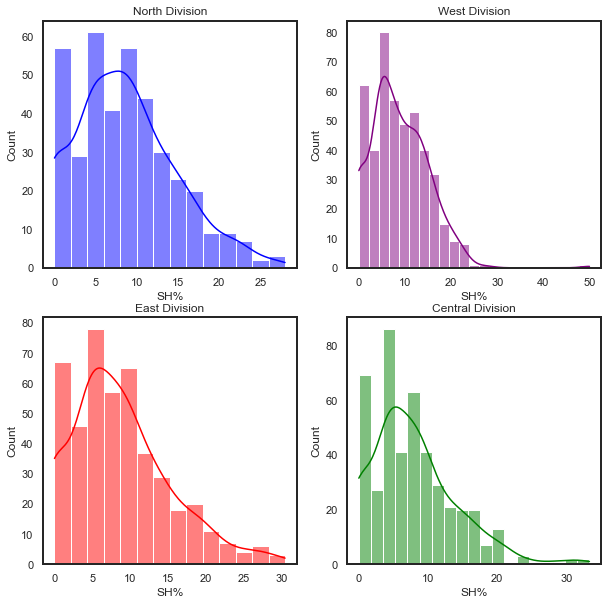

In [133]:
dfn = kp.North_Div1(dfp)
dfw = kp.West_Div1(dfp)
dfe = kp.East_Div1(dfp)
dfc = kp.Cent_Div1(dfp)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=dfn, x="SH%", kde=True, color="blue",ax=axs[0, 0]).set(title='North Division')
sns.histplot(data=dfw, x="SH%", kde=True, color="purple",ax=axs[0, 1]).set(title='West Division')
sns.histplot(data=dfe, x="SH%", kde=True, color="red", ax=axs[1, 0]).set(title='East Division')
sns.histplot(data=dfc, x="SH%", kde=True, color="green", ax=axs[1, 1]).set(title='Central Division')
plt.show()

# Results: 
## Shooting Percentage (SH%) is a measure if a team's shots on goal results in a goal. This is useful as it shows a divisions ability to score, as most goals wins a game.
- When we compare each divisions histogram, we have to look at their SH% and the Count. When looking at the count we are able to see how many times a vaue will appear within our bin size or our values of SH%. We can see that the North Division data has a high count with a relatice low SH% and a decreasing count as SH% incerases above 8-10%. This tells us that the North division was scoring less with each shot on goal but when they did peak their count was around 50. Comparing this to the other divisions we can still see this correlation of count and SH% but the difference is where the peaks are for the other divisions. The other divisions peaks around the same SH% have a much higher count, meaning that over the course of their seasons they were scoring more than the North division. This is a indication that the North division was weaker as not beinng able to score as many goals. 

# Divisional PDO (Luck) 

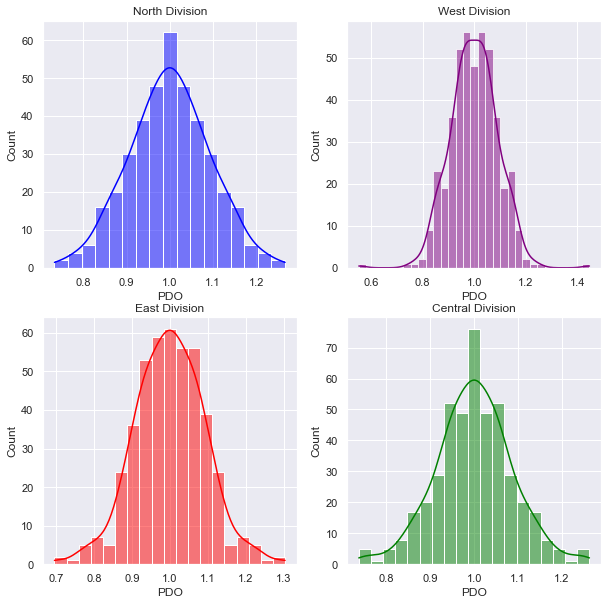

In [122]:
dfn = kp.North_Div1(dfp)
dfw = kp.West_Div1(dfp)
dfe = kp.East_Div1(dfp)
dfc = kp.Cent_Div1(dfp)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=dfn, x="PDO", kde=True, color="blue",ax=axs[0, 0]).set(title='North Division')
sns.histplot(data=dfw, x="PDO", kde=True, color="purple",ax=axs[0, 1]).set(title='West Division')
sns.histplot(data=dfe, x="PDO", kde=True, color="red", ax=axs[1, 0]).set(title='East Division')
sns.histplot(data=dfc, x="PDO", kde=True, color="green", ax=axs[1, 1]).set(title='Central Division')
plt.show()

# Results: 
## PDO is a divisions shooting percentage plus save percentage. When we add these two together it is a statistic that is all luck. (puck luck)
 - When compaing the divisions PDO on the histograms we can see the North divisions pdo peaks at 1.0 which we expect but what is interesting is the frequency/count as well as shape around this value. The North division has a almost perfect normal distribution, this shows that they played most games and averaged a 1.0 PDO which is around the average PDO stat. The other divisions taken as a whole however don't all have this uniform shape. The count in these divisions is much higher around the values from 0.9 to 1.1. A PDO below 0.98 indiciated that a division likely better than they appear, but a PDO over 1.02 indicates that a divison is not as good as they seem. This is where the North divisions consistency plays a good role. They are able to play right around that sweet spot of luck, where as the other divisions were bounching back and forth sometimes playing better than they should be and sometimes plaing worse that they should be. 


# Final Results: 
- From the above analysis we can see that the North Division struggles to play consistently in the stats that matter the most on the outcome of a hockey game. It is very intersting at this season as it will most likely never happen again where no Canadian teams were playing U.S teams in the regular season. The anaylsis shows that the North division struggled to stay out of the penalty box, playing undisiplined, which is a cause for divisions to be better than one another. Also very cool to see that the North division stats were not also the expected shape (probability) compared to the other divsions in teams of CF%, SCF%, but had a almost perfect distribution in the PDO stat. It is enough to say the the North Division was the weakest divison? Yes, but the other divisions are all so drastically close that I wouldnt say they are the worst, I would however say that the games in the North divsion were played sloppy and that their teams need to reevalute some of the basics of what makes a team good. I am excited to look more in depth at my results and improve on my anaylsis statements. 